In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from google.cloud import storage
from io import StringIO
from matplotlib.ticker import FuncFormatter



In [43]:
gclient = storage.Client.from_service_account_json('key.json')

In [44]:
bucket = gclient.bucket('lavoura_permanente')
blobs = bucket.list_blobs()

In [45]:

single_blob = next(blobs)
print(single_blob.name)
df = pd.read_csv(StringIO(single_blob.download_as_text()))

lavoura_permanente


In [ ]:
df = df.dropna(subset='area_colhida')
df = df.dropna(subset='quantidade_produzida')
df = df[df['ano'] == 2014]
x_axis = df[df['area_colhida'] <= 5000]['area_colhida']
y_axis = df[df['area_colhida'] <= 5000]['quantidade_produzida']

print(f'x_len = {len(x_axis)}')
print(f'y_len = {len(y_axis)}')

x_len = 24509
y_len = 24509


In [77]:


x_mean = sum(x_axis) / len(df)
y_mean = sum(y_axis) / len(df)

numerator = 0
denominator = 0

for i in range(len(x_axis)):
    numerator += (x_axis.iloc[i] - x_mean) * (y_axis.iloc[i] - y_mean)
    denominator += (x_axis.iloc[i] - x_mean) ** 2

slope = numerator / denominator
intercept = y_mean - slope * x_mean  
print(f'slope = {slope}')
print(f'intercept = {intercept}')


slope = 0.006607830141835623
intercept = 1250.0358087216052


In [80]:
regression = intercept + slope * x_axis

ValueError: x and y must be the same size

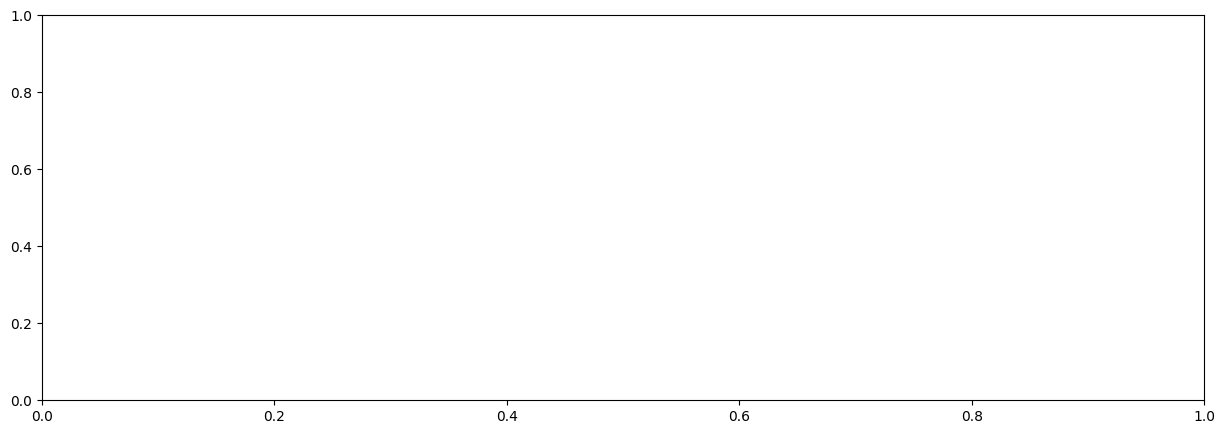

In [81]:

def formatar_milhar(valor, pos):
    return f'{int(valor):,}'.replace(',', '.')


plt.figure(figsize=(15,5))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regression, color='red',linewidth="4")

plt.xlabel('Hectares')
plt.gca().xaxis.set_major_formatter(FuncFormatter(formatar_milhar))
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_milhar))

